In [103]:
import pandas as pd
import json as js
import csv
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns
# import scipy

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [104]:
df = pd.read_csv('runtime_tokendata_benchmarks.csv')
df

,Problem Name,Implementation,Completion Token,Prompt Tokens,Total Tokens,Cost,Total Runtime,Total LLM Time,Total Non LLM Time
0,translation,DSPy,54,320,374,0.002410,6.458436,5.124310,1.334126
1,translation,MTLLM,4,170,174,0.000910,1.540778,0.904846,0.635932
2,essay_reviewer,DSPy,732,1408,2140,0.018020,16.006232,14.883144,1.123088
3,essay_reviewer,MTLLM,216,1387,1603,0.010175,9.717227,9.068518,0.648709
4,joke_gen,DSPy,61,193,254,0.001880,4.707879,4.692913,0.014966
5,joke_gen,MTLLM,19,161,180,0.001090,0.851867,0.801474,0.050393
6,expert_answer,DSPy,153,111,264,0.002850,7.111420,7.101864,0.009555
7,expert_answer,MTLLM,110,274,384,0.003020,3.085123,3.028285,0.056839
8,odd_word_out,DSPy,287,542,829,0.007015,8.989907,8.975601,0.014306
9,odd_word_out,MTLLM,25,228,253,0.001515,0.947746,0.884385,0.063362


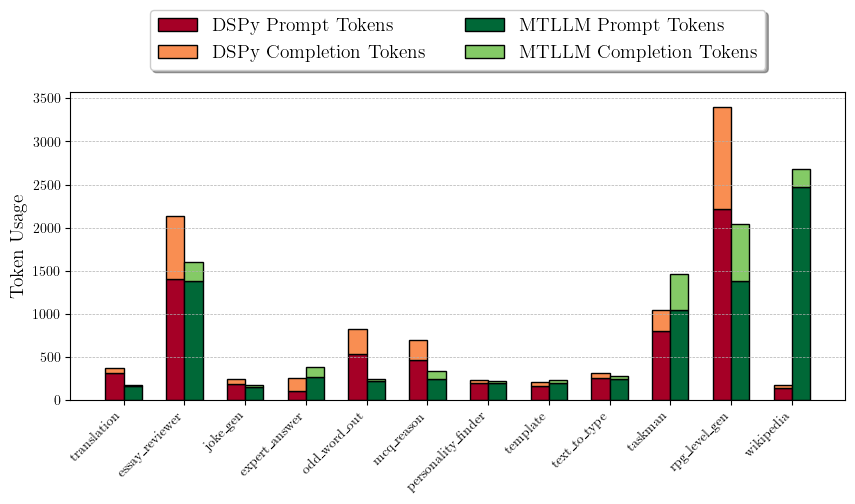

In [111]:
problems = df['Problem Name'].unique()
implementations = df['Implementation'].unique()

data = {}
for problem in problems:
    data[problem] = df[df['Problem Name'] == problem]

# Number of bars per problem
n_bars = len(implementations)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar width and bar positions
bar_width = 0.3
bar_positions = np.arange(len(problems))



# Plotting each implementation
for i, implementation in enumerate(implementations):
    prompt_tokens = [data[problem][data[problem]['Implementation'] == implementation]['Prompt Tokens'].values[0] for problem in problems]
    completion_tokens = [data[problem][data[problem]['Implementation'] == implementation]['Completion Token'].values[0] for problem in problems]
    bottom_tokens = [0] * len(problems)
    
    cmap = plt.get_cmap('RdYlGn')

    if implementation == 'DSPy':
        prompt_color = cmap(0.0)
        completion_color = cmap(0.25)
    else :
        prompt_color = cmap(1.0)
        completion_color = cmap(0.75)

    ax.bar(bar_positions + i * bar_width, prompt_tokens, bar_width, label=f'{implementation} Prompt Tokens', color = prompt_color, edgecolor='black')
    ax.bar(bar_positions + i * bar_width, completion_tokens, bar_width, bottom=prompt_tokens, label=f'{implementation} Completion Tokens', color = completion_color,edgecolor='black')

# Set x-ticks and labels
ax.set_xticks(bar_positions + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(problems, rotation=45, ha='right')

# Set labels and title
ax.set_ylabel('Token Usage', fontsize=14)
# ax.set_title('Token Usage by Problem and Implementation')
ax.legend(loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.3), ncol=2)

plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.savefig('token_usage_benchmarks.png', dpi=300, bbox_inches='tight')
plt.show()


[6.458436, 16.006232, 4.707879, 7.11142, 8.989907, 4.060738, 1.221893, 1.315861, 1.150345, 6.495577, 19.96269, 0.0]
[1.540778, 9.717227, 0.851867, 3.085123, 0.947746, 2.071618, 2.069936, 1.095968, 1.449874, 13.527589, 13.501024, 9.544759]


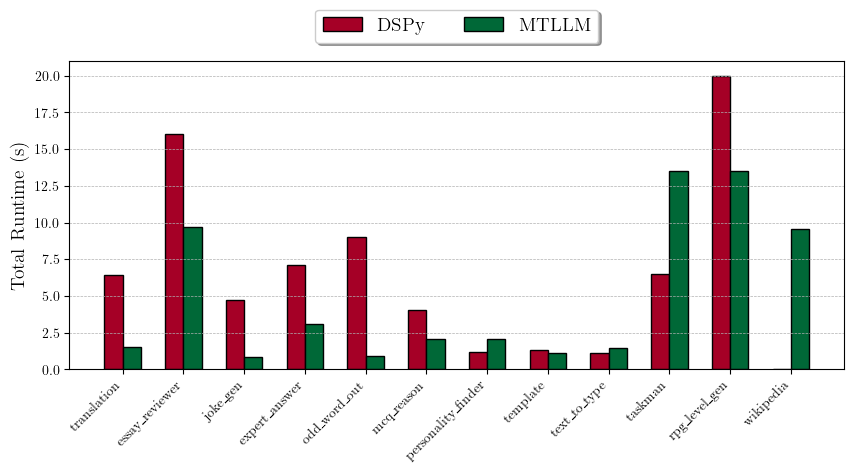

In [112]:
# Number of bars per problem
n_bars = len(implementations)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Bar width and bar positions
bar_width = 0.3
bar_positions = np.arange(len(problems))

# Plotting each implementation
for i, implementation in enumerate(implementations):
    total_runtime = [data[problem][data[problem]['Implementation'] == implementation]['Total Runtime'].values[0] for problem in problems]
    print(total_runtime)
    bottom_tokens = [0] * len(problems)
    cmap = plt.get_cmap('RdYlGn')
    if implementation == 'DSPy':
        runtime_color = cmap(0.0) 
    if implementation == 'MTLLM':
        runtime_color = cmap(1.0)
        
    

    ax.bar(bar_positions + i * bar_width, total_runtime, bar_width, label=f'{implementation}',color = runtime_color, edgecolor='black')

# Set x-ticks and labels
ax.set_xticks(bar_positions + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(problems, rotation=45, ha='right')

# Set labels and title
ax.set_ylabel('Total Runtime (s)', fontsize=14)
# ax.set_title('Total Runtime by Problem and Implementation')
ax.legend(loc='upper center',shadow=True, fontsize=14, bbox_to_anchor=(0.5, 1.2), ncol=3)
ax.set_xlabel("")

plt.grid(axis='y',linestyle='--', linewidth=0.5)
plt.savefig('runtime_benchmarks.png', dpi=300, bbox_inches='tight')
plt.show()